# Homework 4

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from urllib.parse import unquote
import itertools

In [74]:
search_df = pd.read_json('search_sample.txt', lines=True)

In [75]:
query_re = re.compile('query=[^&]*')
def get_row_query(row):
    if row['url']:
        match = query_re.search(row['url'])
        if match != None and match[0]:
            return unquote(match[0][6:]).split(' ')
        return "N/A"
    
def create_keyword_map(row, keywords):
    for keyword in row['query']:
        if keyword in keywords:
            keywords[keyword] += 1
        else:
            keywords[keyword] = 1

In [76]:
search_df['query'] = search_df.apply(lambda row: get_row_query(row), axis=1)

In [77]:
keywords = {}
df_zero_results = search_df[search_df['totalresults'] == 0]
df_zero_results.apply(lambda row: create_keyword_map(row,keywords), axis=1)
keywords = dict(sorted(keywords.items(), key=lambda item: item[1], reverse=True))
top_keywords = dict(itertools.islice(keywords.items(), 20))

### Part 1

Use get_chart_values to create an object that holds two arrays. One array is going to be the x labels for the bar chart, and the other will be the y values. You'll need to pass it a dictionary that has a set of ordered keywords

In [78]:
# Uncomment the function below and replace ? with the correct values

def get_chart_values(keywords):
    x_values = []
    y_values = []
    for k, v in keywords.items():
        x_values.append(k)
        y_values.append(v)
    return [x_values, y_values]

In [79]:
# Uncomment the line below and replace ? with the proper variable

chart_values = get_chart_values(top_keywords)

### Part 2

Use matplotlib to create a bar chart that displays the entries in top_keywords
- reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
- reference: https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm

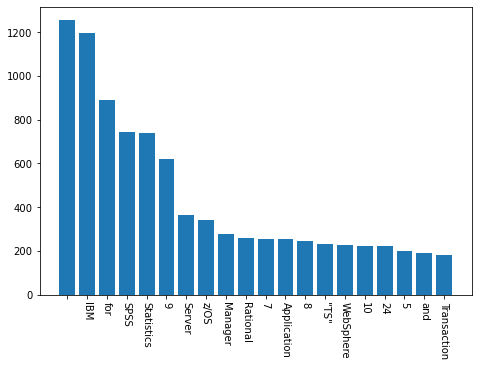

In [80]:
# Uncomment the code below and replace the ? with the correct values

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = chart_values[0]
y = chart_values[1]
ax.bar(x, y)

# The value for rotation should make the x axis labels vertical
plt.xticks(rotation=-90)
plt.show()